In [2]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

## Review

#### Discussion Question: 
Examine the following function and its `if` statement. What change should be made to the code?

In [4]:
def sign(x):
    """determines the sign (+/-) of a numeric input"""
    if x > 0:
        return 'Positive'
    
    elif x < 0:
        return 'Negative'
    
    elif x == 0:
        return 'Neither positive nor negative'

#### Discussion Question: 
Examine the following code and its `for` loop. What changes should be made to the code? I see three!

##### **Task**: compute a running total of the integers 1 through $k$. In this case, $k$ is 5.

- So, the running `total` should be $1+2+3+4+5$!

In [5]:
total = 0

for i in make_array(1,2,3,4,5):
    total = i + total

In [6]:
total

15

## New material

### Probability Question 1

$P(\{Q, K\})$

- Solution with equally likely outcomes:

$$\{A, Q\}, \{A, K\}, \{K, Q\}, \{K, A\}, \textbf{\{Q, K\}}, \{Q, A\}$$

so $P(\{Q, K\})$ = $\frac{1}{6}$

Another solution: $P(\{Q, K\})$ = $P(Q \text{ on first draw}) * P(K \text{ on second draw})$  = $\frac{1}{3} * \frac{1}{2} = \frac{1}{6}$

- This solution uses the **multplication rule**.

### Probability Question 2

- Solution with equally likely outcomes:

$$\{A, Q\}, \{A, K\}, \{K, Q\}, \{K, A\}, \textbf{\{Q, K\}}, \{Q, A\}, \{K, K\}, {\{A, A\}}, \{Q, Q\}$$

so $P(\{Q, K\})$ = $\frac{1}{9}$

Another solution: $P(\{Q, K\})$ = $P(Q \text{ on first draw}) * P(K \text{ on second draw})$  = $\frac{1}{3} * \frac{1}{3} = \frac{1}{9}$
- This solution uses the **multplication rule**.

### Probability Question 3

- Solution with equally likely outcomes:

$$\{A, Q\}, \{A, K\}, \textbf{\{K, Q\}}, \{K, A\}, \textbf{\{Q, K\}}, \{Q, A\}$$

so $P(\{Q, K\})$ = $\frac{2}{6}$

Another solution: The two bolded outcomes are distinct (they cannot happen at the same time). So we have that

$P(\text{ending up with } Q \text{ and } K)$ = $P(\{Q, K\})$ + $P(\{K, Q\})$ = $\frac{1}{6} + \frac{1}{6} = \frac{2}{6} = \frac{1}{3}$
- This solution uses the **addition rule**.

### Probability Question 4

- Solution with equally likely outcomes:

$$\textbf{\{A, Q\}}, \textbf{\{A, K\}}, \{K, Q\}, \textbf{\{K, A\}}, \{Q, K\}, \textbf{\{Q, A\}}$$

so $P(\{Q, K\})$ = $\frac{4}{6}$

Another solution: 
- The pair of cards either contains an ace or it does not.
- We already found the probability that the pair does not contain an ace. What is it? (30 sec-1 min)

$P(\text{ending up with at least one } A)$ = $1$ - ($P(\{Q, K\})$ + $P(\{K, Q\})$ = $\frac{4}{6}$ = $\frac{2}{3}$
- This solution uses the **complement rule**.

### The Monty Hall Problem is great to simulate! ###

In [7]:
goats = make_array('first goat', 'second goat')
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'],
      dtype='<U11')

A goat is always revealed. First, we'll define a function that determines which goat is revealed.

In [8]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [9]:
make_array(other_goat('first goat'), other_goat('second goat'))

array(['second goat', 'first goat'],
      dtype='<U11')

In [10]:
def monty_hall():
    """Return 
    [contestant's guess, what Monty reveals, 
    what remains behind the other door]"""
    
    #Contest randonmlychooses one of the three doors
    contestant_choice = np.random.choice(doors)

    #Scenario #1 - Contest chooses the first goat
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_choice = 'car'
        
    #Scenario #2 - Content chooses the second goat
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_choice = 'car'
    
   #Scenario #3 - Contestant chooses the car
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_choice = other_goat(monty_choice)
        
    return make_array(contestant_choice, monty_choice, remaining_choice)

In [11]:
monty_hall()

array(['car', 'second goat', 'first goat'],
      dtype='<U11')

In [12]:
results = Table(make_array("Contestant's Choice", "Monty's Choice", 'Remaining'))
results

Contestant's Choice,Monty's Choice,Remaining


In [13]:
results = Table(make_array("Contestant's Choice", "Monty's Choice", 'Remaining'))

for i in np.arange(10000):
    # this is the table method append-- not the numpy (array method) append
    # with the table method, you do not need to save the table back into itself
    results.append(monty_hall())


In [14]:
results.show(3)

Contestant's Choice,Monty's Choice,Remaining
first goat,second goat,car
second goat,first goat,car
car,second goat,first goat


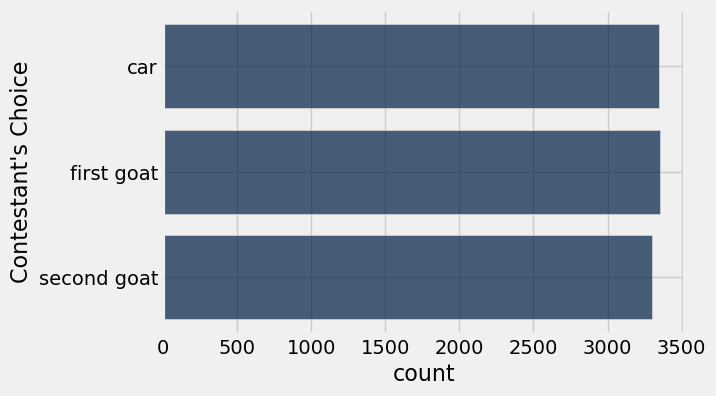

In [18]:
results.group("Contestant's Choice").barh("Contestant's Choice")
plt.show()

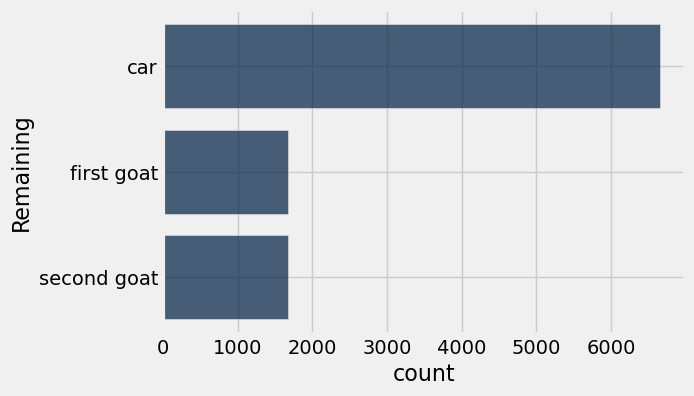

In [21]:
results.group('Remaining').barh('Remaining')
plt.show()

______

### Challenge Task: Demo for Questions 1 and 2

In [22]:
cards = make_array('A', 'K', 'Q')
cards

array(['A', 'K', 'Q'],
      dtype='<U1')

In [23]:
np.random.choice(cards, 2, replace=False)

array(['K', 'A'],
      dtype='<U1')

You could have also made an array of size six and drawn from this six times.

In [24]:
#Defining a function to simulate the game
def three_card_game():
    two_cards_drawn = np.random.choice(cards, 2, replace=False)
    return make_array(two_cards_drawn.item(0), two_cards_drawn.item(1))

In [25]:
three_card_game()

array(['Q', 'K'],
      dtype='<U1')

In [26]:
results = Table(make_array('First Card', 'Second Card'))
results

First Card,Second Card


Repeat the simulation 10,000 times.

In [44]:
for i in np.arange(20000):
    results.append(three_card_game())
results.show(5)

First Card,Second Card
Q,A
K,Q
A,Q
K,A
K,Q


Getting the count of each unique 2 card combinations from the simulations

In [45]:
results_grouped = results.group(make_array('First Card','Second Card'))
results_grouped

First Card,Second Card,count
A,K,4901
A,Q,4955
K,A,4903
K,Q,5100
Q,A,5131
Q,K,5010


Let's see if the number of unique combinations is what we wrote above.

In [46]:
unique_combinations = results_grouped.num_rows
unique_combinations

6

How many times each combination appeared

In [47]:
card_counts = results_grouped.column('count')

How many total simulations were conducted


In [48]:
total_simulations = sum(results_grouped.column('count'))

Updating the table to contain the proportion of times each combination appeared

In [49]:
results_grouped = results_grouped.with_column('Proportion',(card_counts/total_simulations))
results_grouped

First Card,Second Card,count,Proportion
A,K,4901,0.163367
A,Q,4955,0.165167
K,A,4903,0.163433
K,Q,5100,0.17
Q,A,5131,0.171033
Q,K,5010,0.167


This justifies our earlier calculations. The proportion of $\{Q, K\}$ is approximately $\frac{1}{6}$, and the combined proportion of either $\{Q, K\}$ or  $\{K, Q\}$ is $\frac{2}{6} = \frac{1}{3}$.

In [50]:
results_grouped = results_grouped.with_column('combination', '{' + results_grouped.column(0) + ',' + results_grouped.column(1) + '}')
results_grouped

First Card,Second Card,count,Proportion,combination
A,K,4901,0.163367,"{A,K}"
A,Q,4955,0.165167,"{A,Q}"
K,A,4903,0.163433,"{K,A}"
K,Q,5100,0.17,"{K,Q}"
Q,A,5131,0.171033,"{Q,A}"
Q,K,5010,0.167,"{Q,K}"


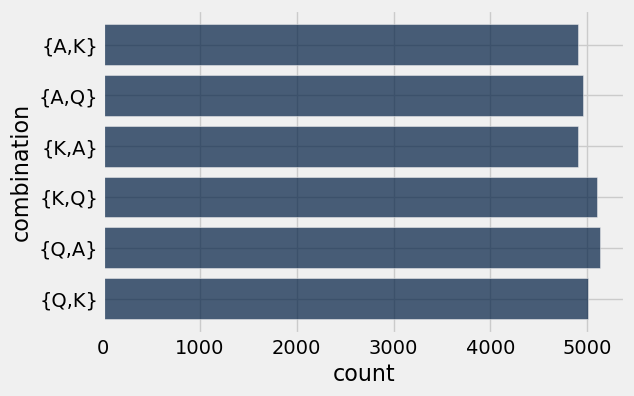

In [51]:
results_grouped.barh(4, 2)
plt.show()

In [3]:
coin = make_array('Heads', 'Tails')

In [4]:
def one_simulated_value():
    outcomes = np.random.choice(coin, 100)
    return np.count_nonzero(outcomes == 'Heads')

In [5]:
num_repetitions = 20000   # number of repetitions

heads = make_array() # empty collection array

for i in np.arange(num_repetitions):   # repeat the process num_repetitions times
    new_value = one_simulated_value()  # simulate one value using the function defined
    heads = np.append(heads, new_value) # augment the collection array with the simulated value

# That's it! The simulation is done.

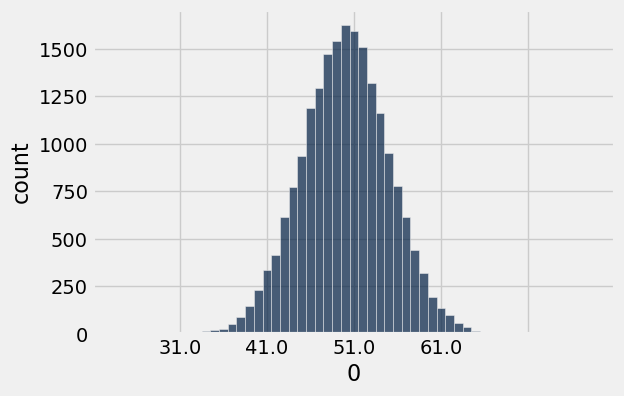

In [12]:
heads_count = Table().with_column('heads', heads)
heads_count.group('heads').bar(0)
plt.show()

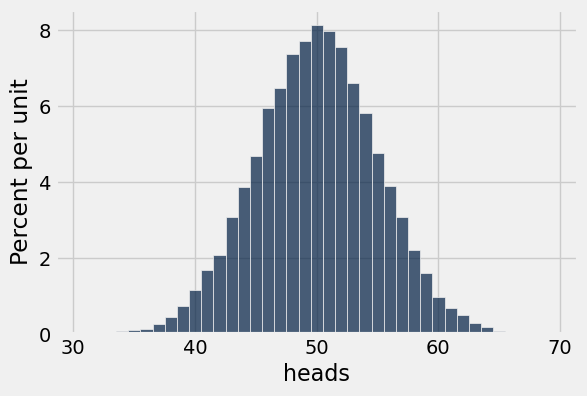

In [19]:
heads_count.hist(bins = np.arange(30.5, 69.6, 1))
plt.show()

In [13]:
heads.mean()

49.9908

In [14]:
simulation_results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)

In [15]:
simulation_results.show(3)

Repetition,Number of Heads
1,57
2,48
3,47


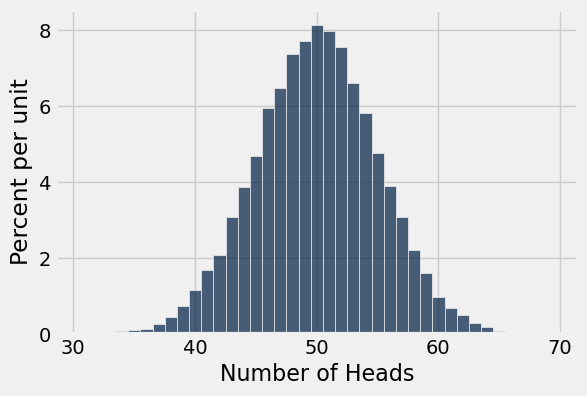

In [18]:
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))
plt.show()

In [20]:
goats = make_array('first goat', 'second goat')

In [21]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [22]:
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

In [23]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [24]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [28]:
monty_hall_game()

['second goat', 'first goat', 'car']

In [29]:
# empty collection table
games = Table(['Guess', 'Revealed', 'Remaining'])

# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    games.append(monty_hall_game())

In [31]:
games.show(5)

Guess,Revealed,Remaining
car,second goat,first goat
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car


In [32]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3353
first goat,3382
second goat,3265


In [33]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6647
first goat,1680
second goat,1673


In [34]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3353,6647
first goat,3382,1680
second goat,3265,1673


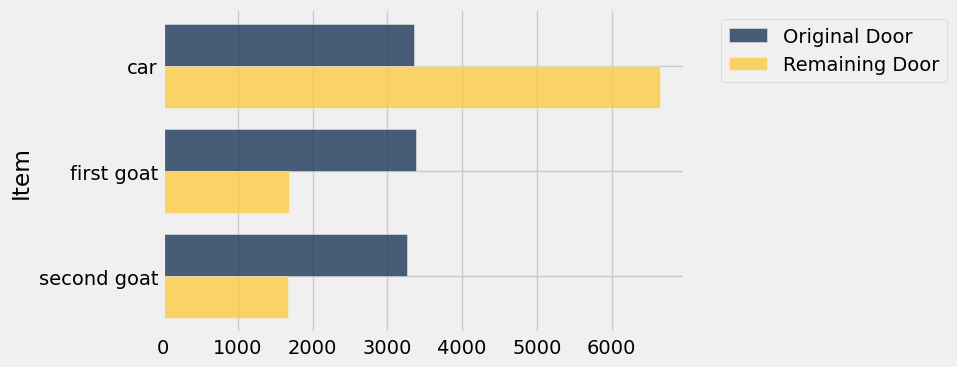

In [35]:
combined.barh(0)
plt.show()